In [2]:
from IPython.display import display

# PERFORMANCE AT VARIOUS SIGNAL TO NOISE RATIOS

## RESULTS

The original, unchanged model was trained on various signal-to-noise ratios. 
This ratio is controlled by the parameter **A** which is the amplitude of the signal.
By increasing **A** the amount of "pattern" in the generated dataset is more so we would expect the performance of the model trained on datasets which have a bigger signal-to-noise ratio to be better. 
For simplicity of reading the results are in the cell below, as expected the performance of the model gets progressively better with bigger **A**s.

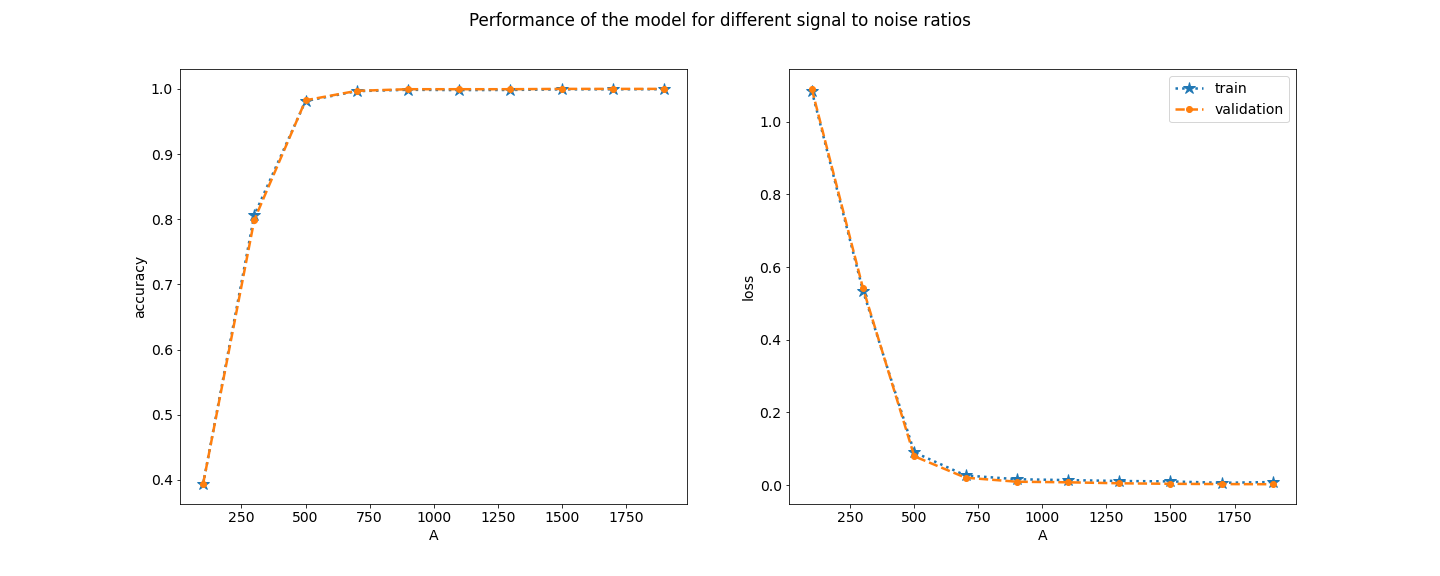

In [3]:
from IPython import display # need this import again for unclear reasons
display.Image(filename='performance_at_last_epoch_different_A.png') 

# REGULARIZATION STUDY

## RESULTS

We tested the original model with L1 and L2 regularization, for different values of the regularization parameter **λ**. Loosely speaking this parameter controls the trade-off between a simpler/more flexible model (**high λ**), which comes with the risk of underfitting and a more complex model (with no regularization, **λ = 0**), which comes at the risk of overfitting.
We then represented the train and test accuracies at the last epoch for different values of lambda. 
For readability the results are represented below.

As can be seen the best accuracies obtained in both cases correspond to a value of **λ = 10e-3**.

### L1

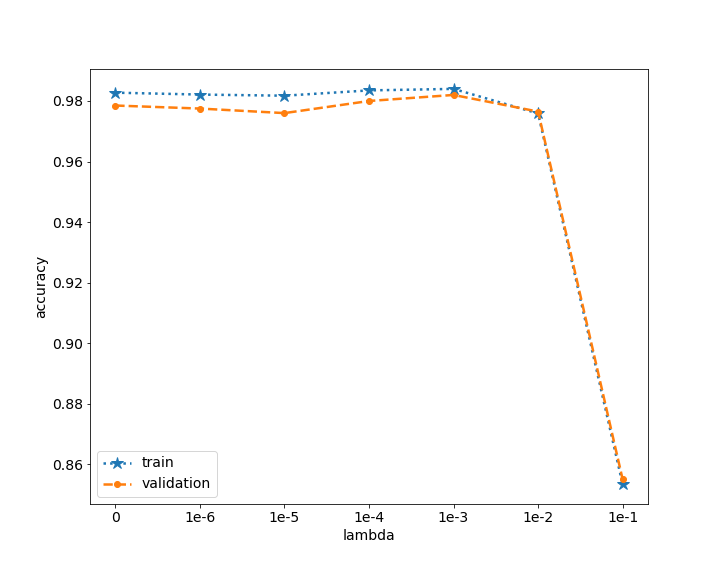

In [8]:
from IPython import display # need this import again for unclear reasons
display.Image(filename='plot_lambda_l1.png')

### L2

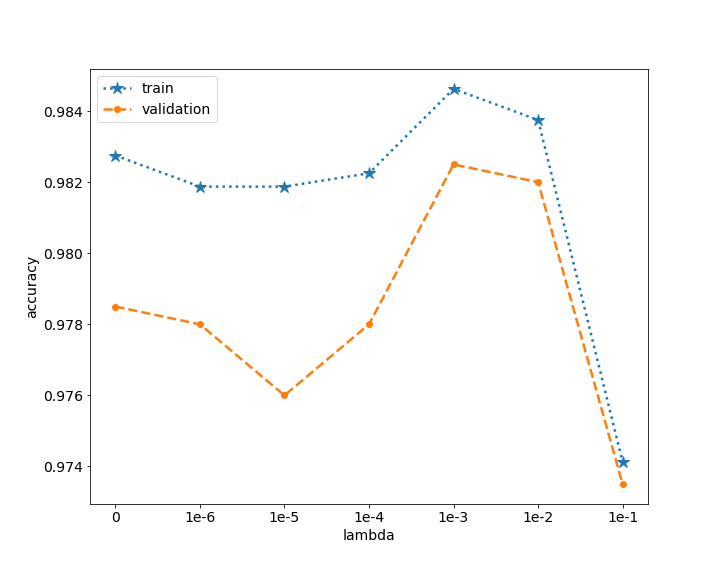

In [6]:
display.Image(filename='plot_lambda_l2.png') 

In [172]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten #, Reshape
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

%run plot.py
#list_of_train_acc=[0,0,0,0,0,0,0,0,0,0]
#list_of_valid_acc=[0,0,0,0,0,0,0,0,0,0]
#list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
#list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
#list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
#A_list = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]


In [173]:
A = 1900

# Generate data

In [174]:
np.random.seed(12345)

# function for the random step, using lambda construction
# int() for cleaner look and for mimiking a detector with finite resolution
jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))

-5
28
-20
-22
103
74
9
19
43
67


In [175]:
def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

[0, -5, 23, 3, -19, 84, 158, 167, 186, 229, 296, 351, 292, 310, 326, 398, 447, 352, 339, 427, 411, 390, 418, 585, 539, 516, 527, 547, 578, 583, 655, 625, 589, 476, 388, 350, 383, 325, 335, 287, 308, 196, 192, 120, 77, 17, 36, 59, 27, 48, 120, 128, 145, 149, 204, 275, 235, 163, 169, 211] 0
[183, 231, 235, 242, 280, 327, 285, 288, 669, 1100, 1439, 1680, 1928, 2034, 2008, 1873, 1551, 1131, 632, 110, 126, 133, 81, 126, 152, 207, 303, 259, 306, 305, 355, 369, 482, 482, 587, 593, 637, 647, 615, 649, 661, 588, 565, 568, 527, 508, 511, 570, 624, 600, 684, 663, 690, 741, 668, 622, 607, 623, 619, 657] 1
[580, 623, 678, 663, 597, 579, 558, 521, 610, 643, 134, -283, -630, -843, -1106, -1210, -1095, -956, -631, -211, 286, 783, 751, 706, 825, 746, 794, 774, 749, 796, 798, 793, 831, 835, 777, 810, 841, 801, 790, 777, 894, 865, 828, 836, 837, 826, 839, 855, 854, 851, 785, 799, 883, 811, 830, 807, 807, 804, 789, 732] 2


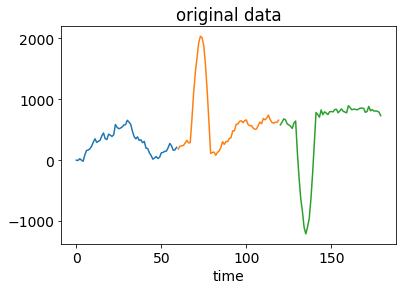

In [176]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
# number of data samples
N=10000
# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5

y = [0] * N #10000 zeros
x = [[0] * L for i in range(N)] #each sample has size 60, we create 10000 samples
for i in range(N):
    if i>0: #start at 1, zero is always zero
        x[i][0] = x[i-1][-1] + jump(bias,DX) # new point is obtained by jump from previous point
    for j in range(1,L):
        x[i][j] = x[i][j-1] + jump(bias,DX) 
    y[i] = i%3 
    ##y[i] = random.randint(0,2)
    if y[i]>0:
        j0 = np.random.randint(0,L-1-Z)
        ###print(i,j0,j1)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)
            
for i in range(min(3,N)):
    print(x[i],y[i])
    

Show_data(x,L,"original data")

In [177]:
# command in linux
!mkdir DATA
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
print(str0)

fname='DATA/x_'+str0
np.savetxt(fname,x,fmt="%d")
fname='DATA/y_'+str0
np.savetxt(fname,y,fmt="%d")

mkdir: cannot create directory ‘DATA’: File exists
ts_L60_Z12_A1900_DX50_bias5_N10000.dat


### Read data

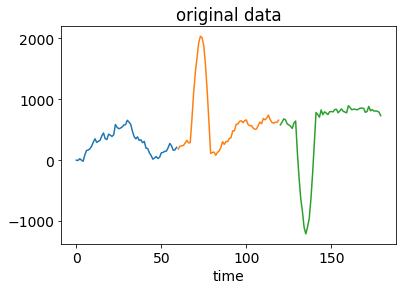

data:  10000


In [178]:
fnamex='DATA/x_'+str0
fnamey='DATA/y_'+str0

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
N,L = len(x), len(x[0])

Show_data(x,L,"original data")

categ = np.loadtxt(fnamey, dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y = np.zeros((N,n_class))
for i in range(N):
    y[i][categ[i]] = 1.

### Rescale data, split train/val.

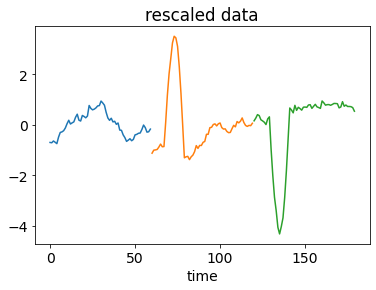

N_train= 8000   N_val= 2000   L= 60   n_class= 3


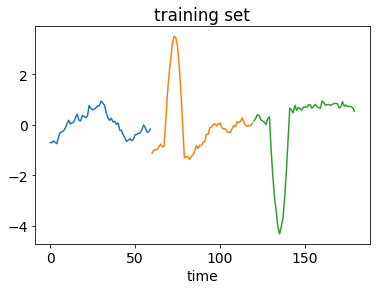

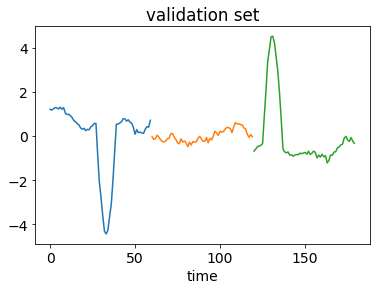

In [179]:
#
#  FIRST PASSAGE:  DO NOT DO THIS --> FAILURE 
#
#remove average value of each sample from its values

xm = x.mean(axis=1)
for i in range(N):
    x[i] = x[i]-xm[i]
    
#
#  SECOND PASSAGE:  DO NOT DO THIS --> ALSO FAILURE 
#
#rescale (crude version, variance should be used)
x = x/400
    
Show_data(x,L,"rescaled data")

perc_train=0.8
N_train = int(perc_train*N)
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]
N_val = len(x_val)
print('N_train=',N_train,'  N_val=',N_val,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val =  x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

Show_data(x_train, L, "training set")
Show_data(x_val, L, "validation set")

## Convolutional NN

In [180]:
# ... LESSON ...



np.random.seed(12345)


import tensorflow.random as tf_r
tf_r.set_seed(12345)



from keras import regularizers, initializers

reg = regularizers.l2(0.02) #ridge with lambda = 0.02
#reg = regularizers.l2(0.01) #lasso with lambda = 0.1


ini = keras.initializers.RandomNormal(mean = 0.0, stddev = 0.05, seed = None)

NCONV = 1
NF = 5 #number of filters


model = Sequential()

if NCONV ==1: 
    model.add(Conv1D(filters = NF, 
                     kernel_size = 11, 
                     kernel_initializer = ini, 
                     kernel_regularizer = reg,
                     activation = 'relu', 
                     input_shape = input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))  #maybe too much (?)
    model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(12, activation = 'relu'))
    model.add(Dropout(0.2))

model.add(Dense(n_class, activation = 'softmax'))


print('---Model', NCONV, '---')
print(model.summary())



opt = tf.keras.optimizers.Adam()

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics = ['accuracy'])


















---Model 1 ---
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 50, 5)             60        
                                                                 
 average_pooling1d_9 (Averag  (None, 10, 5)            0         
 ePooling1D)                                                     
                                                                 
 conv1d_19 (Conv1D)          (None, 4, 5)              180       
                                                                 
 flatten_9 (Flatten)         (None, 20)                0         
                                                                 
 dense_18 (Dense)            (None, 12)                252       
                                                                 
 dropout_9 (Dropout)         (None, 12)                0         
                                       

In [181]:
model.layers

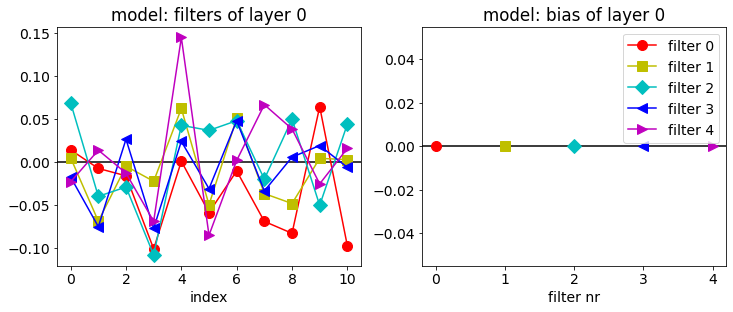

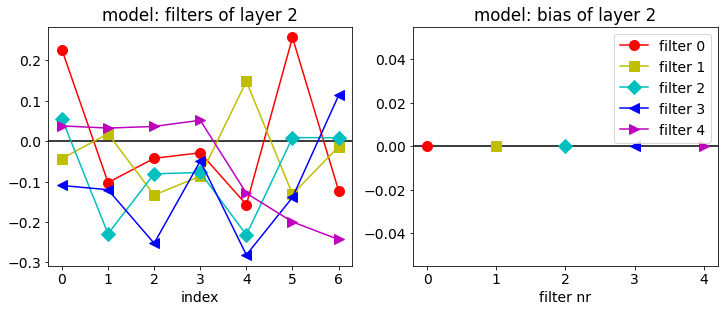

In [182]:
def Show_weights(model,l=0,label="model"):
    c=['r','y','c','b','m']
    m=['o','s','D','<','>']
    ms=10
    
    w = model.layers[l].get_weights()[0]
    wT=w.T
    M=len(wT)
    b = model.layers[l].get_weights()[1]
    
    fig,AX=plt.subplots(1,2,figsize=(12,4.4))
    ax=AX[0]
    ax.axhline(0, c="k")
    ax.plot((0,))
    for i in range(M):
        ax.plot(wT[i][0],"-",c=c[i],marker=m[i],label=str(i),markersize=ms)
    ax.set_title(label+': filters of layer '+str(l))
    ax.set_xlabel('index')
    ax=AX[1]
    ax.axhline(0, c="k")
    for i in range(M):
        ax.plot((i),(b[i]),c=c[i],marker=m[i],label="filter "+str(i),markersize=ms)
    ax.set_title(label+': bias of layer '+str(l))
    ax.set_xlabel('filter nr')
    ax.set_xticks(np.arange(5))
    ax.legend()
    plt.show()
    
Show_weights(model,0)
Show_weights(model,2)

In [183]:
# ...LESSON ...



BATCH_SIZE = 250
EPOCHS = 100

print('---Model ', NCONV, '---\nFITTING...')
fit = model.fit(x_train, y_train,
                batch_size = BATCH_SIZE,
                epochs = EPOCHS,
                validation_data = (x_val, y_val),
                verbose = 2,
                shuffle = True)


---Model  1 ---
FITTING...
Epoch 1/100
32/32 - 1s - loss: 1.0895 - accuracy: 0.3817 - val_loss: 1.0589 - val_accuracy: 0.4245 - 694ms/epoch - 22ms/step
Epoch 2/100
32/32 - 0s - loss: 0.9941 - accuracy: 0.5405 - val_loss: 0.8967 - val_accuracy: 0.6915 - 138ms/epoch - 4ms/step
Epoch 3/100
32/32 - 0s - loss: 0.8062 - accuracy: 0.7381 - val_loss: 0.6821 - val_accuracy: 0.8495 - 136ms/epoch - 4ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6032 - accuracy: 0.8289 - val_loss: 0.4459 - val_accuracy: 0.9080 - 142ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4089 - accuracy: 0.8959 - val_loss: 0.2461 - val_accuracy: 0.9785 - 136ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2596 - accuracy: 0.9456 - val_loss: 0.1317 - val_accuracy: 0.9890 - 136ms/epoch - 4ms/step
Epoch 7/100
32/32 - 0s - loss: 0.1802 - accuracy: 0.9653 - val_loss: 0.0813 - val_accuracy: 0.9955 - 141ms/epoch - 4ms/step
Epoch 8/100
32/32 - 0s - loss: 0.1387 - accuracy: 0.9771 - val_loss: 0.0572 - val_accuracy: 0.9960 - 137

Epoch 67/100
32/32 - 0s - loss: 0.0151 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 1.0000 - 147ms/epoch - 5ms/step
Epoch 68/100
32/32 - 0s - loss: 0.0143 - accuracy: 0.9987 - val_loss: 0.0040 - val_accuracy: 1.0000 - 171ms/epoch - 5ms/step
Epoch 69/100
32/32 - 0s - loss: 0.0134 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 1.0000 - 131ms/epoch - 4ms/step
Epoch 70/100
32/32 - 0s - loss: 0.0122 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 1.0000 - 137ms/epoch - 4ms/step
Epoch 71/100
32/32 - 0s - loss: 0.0131 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 1.0000 - 143ms/epoch - 4ms/step
Epoch 72/100
32/32 - 0s - loss: 0.0133 - accuracy: 0.9989 - val_loss: 0.0038 - val_accuracy: 1.0000 - 163ms/epoch - 5ms/step
Epoch 73/100
32/32 - 0s - loss: 0.0125 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 1.0000 - 130ms/epoch - 4ms/step
Epoch 74/100
32/32 - 0s - loss: 0.0130 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 1.0000 - 133ms/epoch - 4ms/step


In [184]:
list_of_Trainloss[A_list.index(A)]=fit.history['loss'][-1]
list_of_Validloss[A_list.index(A)]=fit.history['val_loss'][-1]
list_of_train_acc[A_list.index(A)]=fit.history['accuracy'][-1]
list_of_valid_acc[A_list.index(A)]=fit.history['val_accuracy'][-1]


In [191]:
np.savetxt("Trainloss_last_epoch",list_of_Trainloss)
np.savetxt("Validloss_last_epoch",list_of_Validloss)
np.savetxt("TrainAcc_last_epoch",list_of_train_acc)
np.savetxt("ValidAcc_last_epoch",list_of_valid_acc)

In [193]:
train_losses = np.loadtxt("Trainloss_last_epoch")
valid_losses = np.loadtxt("Validloss_last_epoch")
train_accuracies = np.loadtxt("TrainAcc_last_epoch")
valid_accuracies = np.loadtxt("ValidAcc_last_epoch")

print(train_losses)
print(valid_losses)    
print(train_accuracies)      
print(valid_accuracies)      

[1.08486438 0.53454995 0.09053368 0.02675743 0.01633844 0.01391872
 0.01154987 0.01030338 0.00648559 0.00859364]
[1.0906148  0.54174453 0.07958764 0.02061877 0.00950222 0.00789815
 0.00518445 0.0037247  0.00299863 0.00257299]
[0.39337501 0.80637503 0.98137498 0.99650002 0.99862498 0.99812502
 0.998375   0.99924999 0.99937499 0.99949998]
[0.3935     0.79900002 0.98250002 0.99699998 0.99949998 0.99949998
 0.99949998 1.         1.         1.        ]


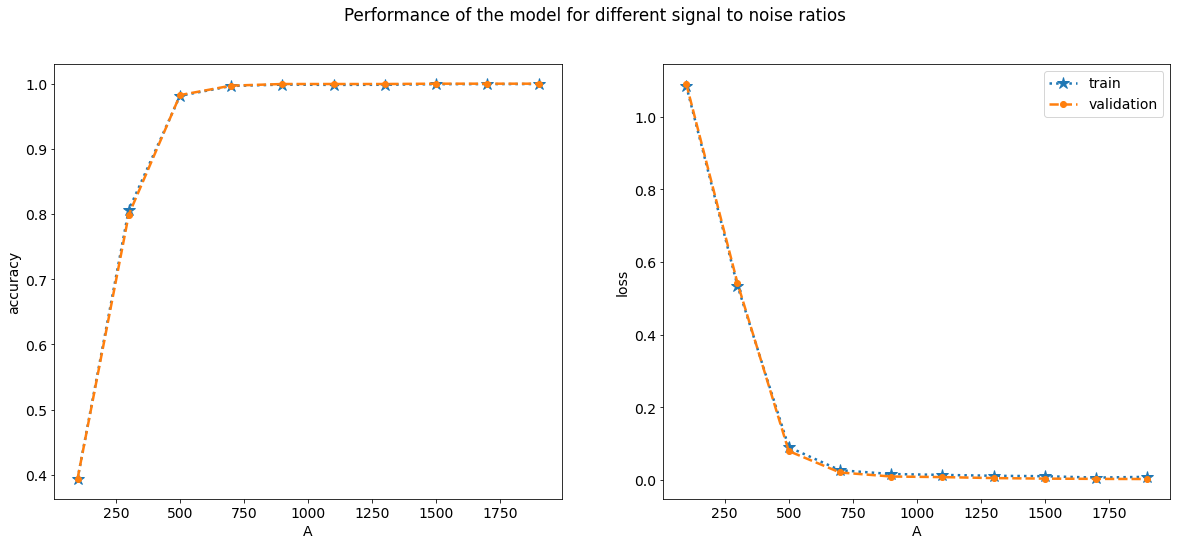

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Performance of the model for different signal to noise ratios')
ax1.plot(A_list, train_accuracies, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax1.plot(A_list, valid_accuracies, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax1.set_xlabel('A')
ax1.set_ylabel('accuracy')
ax2.plot(A_list, train_losses, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax2.plot(A_list, valid_losses, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax2.set_xlabel('A')
ax2.set_ylabel('loss')

plt.legend(loc = 'best')
plt.savefig('performance_at_last_epoch_different_A.png')

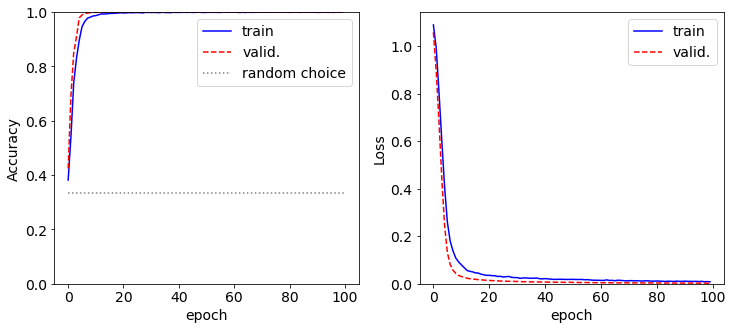

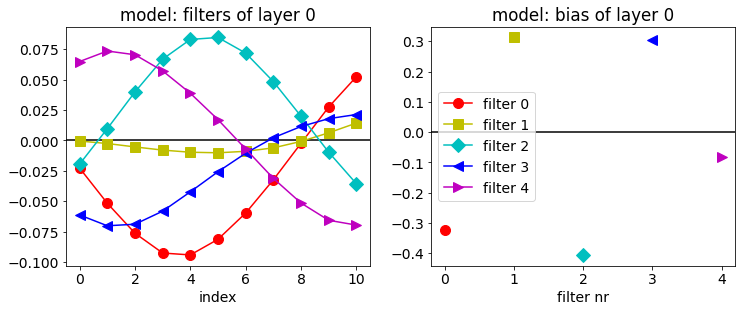

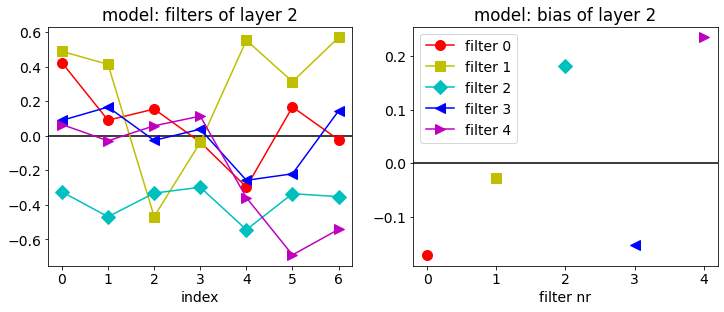

In [188]:
def Show_history(fit):
    fig,AX=plt.subplots(1,2,figsize=(12,5.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],"b",label="train")
    ax.plot(fit.history['val_accuracy'],"r--",label="valid.")
    ax.plot((0,EPOCHS),(1/3,1/3),":",c="gray",label="random choice")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0, 1])
    ax.legend()
    ax=AX[1]
    ax.plot(fit.history['loss'],"b",label="train")
    ax.plot(fit.history['val_loss'],"r--",label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.set_ylim([0, 1.05*np.max(fit.history['loss'])])
    ax.legend()
    plt.show()
Show_history(fit)
Show_weights(model,0)
Show_weights(model,2)

In [189]:
# ...LESSON ...


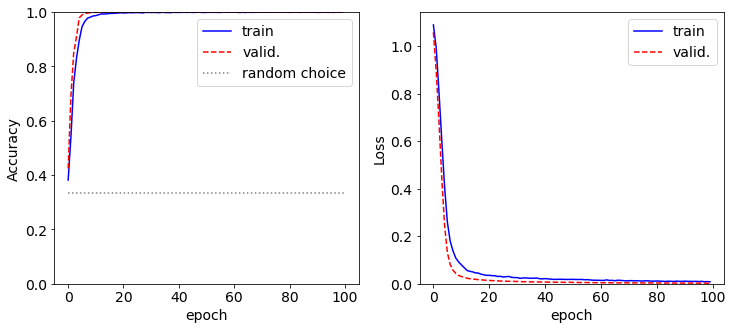

NameError: name 'fit2' is not defined

In [190]:
Show_history(fit)
Show_history(fit2)
Show_weights(model2,0,label="model2")
Show_weights(model2,2,label="model2")

In [ ]:
import pandas as pd
from scipy import stats

import seaborn 
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn import preprocessing

LABELS = ["absent","positive","negative"]
cmap="GnBu"

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 5))
    seaborn.heatmap(matrix,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',
                linecolor='white',
                linewidths=1,
                cmap=cmap)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model.predict(x_val)
# Take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)

show_confusion_matrix(max_y_val, max_y_pred_val)

#print(classification_report(max_y_val, max_y_pred_val))